In [ ]:
#ANALYSIS

#Temperature is mildly correlated to location specifically Lalitude, depending on the latitude is how high the temperature
#Cloudliness and Humidity are not correlated with latitude. These variable do not depend from each other.
#Cloudiness and humidity seem to be similar between each other, and they behave similarly between bothe hemispheres. Their distribution seem to be widly spread to be able to check for a trend


In [1]:

# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import random
import scipy.stats as st
from scipy.stats import linregress
from API_keys import weather_api_key, g_key
from citipy import citipy


In [2]:
output_data_file = "Resources/Homework-06-Python-APIs_output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [4]:
#Perform a weather check on each city using a series of successive API calls.
# #Include a print log of each city as it'sbeing processed (with the city number and city name).
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []

In [5]:
counter = 0 
counter2 = 0
print('Beginning Data Retrieval')
print('----------------------------------------')

base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{base_url}appid={weather_api_key}&units={units}&q='


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if counter > 49:
            counter = 0
            counter2 = counter2 + 1
    
        else:
            counter = counter + 1
            
        print(f'Processing Record {counter} of Set {counter2} : {city}') 
  
    except(KeyError, IndexError):
        print('City not found. Skipping...')

print('----------------------------------')
print('Data Retrieval Complete')
print('----------------------------------')

 kodiak
City not found. Skipping...
Processing Record 11 of Set 2 : liliani
Processing Record 12 of Set 2 : richards bay
Processing Record 13 of Set 2 : adrar
Processing Record 14 of Set 2 : port alfred
Processing Record 15 of Set 2 : ajdabiya
Processing Record 16 of Set 2 : port elizabeth
Processing Record 17 of Set 2 : patos
Processing Record 18 of Set 2 : talnakh
Processing Record 19 of Set 2 : kamaishi
Processing Record 20 of Set 2 : asau
Processing Record 21 of Set 2 : issia
Processing Record 22 of Set 2 : wawa
Processing Record 23 of Set 2 : santa maria da vitoria
Processing Record 24 of Set 2 : port blair
Processing Record 25 of Set 2 : pestovo
Processing Record 26 of Set 2 : porto belo
Processing Record 27 of Set 2 : hasaki
Processing Record 28 of Set 2 : moron
Processing Record 29 of Set 2 : san gabriel
Processing Record 30 of Set 2 : puerto del rosario
Processing Record 31 of Set 2 : puerto escondido
Processing Record 32 of Set 2 : komsomolskiy
Processing Record 33 of Set 2 :

In [6]:
weather_df = pd.DataFrame({'City': city_name,'Lat': lat, 'Lng': lng,'Max Temp': max_temp,'Humidity': humidity,
                           'Cloudiness': clouds, 'Wind Speed': wind_speed,'Country': country,'Date': date})
weather_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [7]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.60,73.08,82.35,77,88,12.95,MV,1599524962
1,Constitución,-35.33,-72.42,50.09,83,87,5.91,CL,1599524962
2,Martaban,16.53,97.61,78.13,93,100,4.85,MM,1599524962
3,Yellowknife,62.46,-114.35,50.00,81,75,16.11,CA,1599524775
4,Baruun-Urt,46.68,113.28,57.07,70,1,9.48,MN,1599524963


In [8]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,20.692557,9.247002,67.511711,71.869489,47.671958,8.104004,1.599525e+09
std,32.374888,86.823864,14.475162,21.061174,40.099941,5.431345,1.047699e+02
min,-54.800000,-179.170000,21.780000,6.000000,0.000000,0.250000,1.599524e+09
25%,-4.470000,-65.510000,55.910000,62.000000,1.000000,4.210000,1.599525e+09
50%,21.460000,14.870000,69.800000,77.000000,40.000000,6.930000,1.599525e+09
75%,48.270000,72.915000,78.845000,87.000000,90.000000,10.905000,1.599525e+09
max,78.220000,179.320000,106.000000,100.000000,100.000000,34.020000,1.599525e+09


No data over 100% humidity

In [9]:
 #  Get the indices of cities that have humidity over 100%.
    
over_hum = weather_df[weather_df['Humidity']>100].index.values.astype(int)
over_hum

array([], dtype=int64)

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df = weather_df.drop(over_hum, inplace = False)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.60,73.08,82.35,77,88,12.95,MV,1599524962
1,Constitución,-35.33,-72.42,50.09,83,87,5.91,CL,1599524962
2,Martaban,16.53,97.61,78.13,93,100,4.85,MM,1599524962
3,Yellowknife,62.46,-114.35,50.00,81,75,16.11,CA,1599524775
4,Baruun-Urt,46.68,113.28,57.07,70,1,9.48,MN,1599524963
...,...,...,...,...,...,...,...,...,...
562,Bima,-8.47,118.72,86.70,54,10,4.21,ID,1599525245
563,Santiago del Estero,-27.80,-64.26,64.22,53,80,6.96,AR,1599525074
564,Yabēlo,4.88,38.08,58.15,86,66,6.80,ET,1599525246
565,Sampang,-7.19,113.24,82.09,72,34,9.10,ID,1599525246


In [12]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
weather_df.to_csv(output_data_file, index = False)

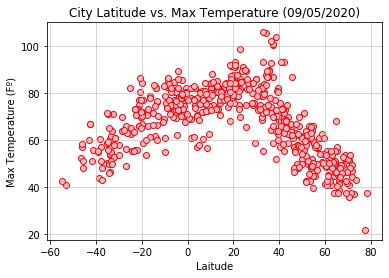

In [14]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

plt.scatter(weather_df['Lat'], weather_df['Max Temp'], facecolor = "pink", edgecolor = "red")
plt.xlabel('Laitude')
plt.ylabel('Max Temperature (Fº)')
plt.title('City Latitude vs. Max Temperature (09/05/2020)')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig('Images/City Latitude vs Max Temperature.png')

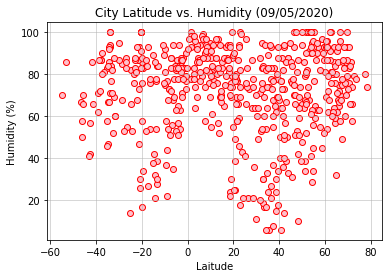

In [15]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], facecolor = "pink", edgecolor = "red")
plt.xlabel('Laitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (09/05/2020)')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig('Images/City Latitude vs Humidity.png')

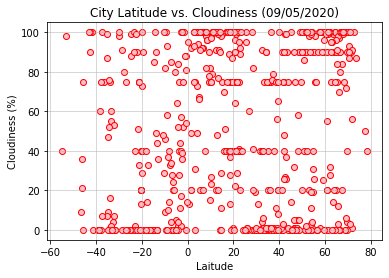

In [16]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], facecolor = "pink", edgecolor = "red")
plt.xlabel('Laitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (09/05/2020)')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig('Images/City Latitude vs Cloudiness.png')

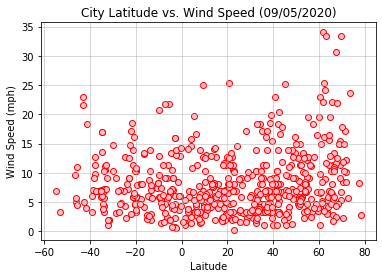

In [17]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], facecolor = "pink", edgecolor = "red")
plt.xlabel('Laitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (09/05/2020)')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig('Images/City Latitude vs Wind Speed.png')

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

In [19]:
# Create Northern and Southern Hemisphere DataFrames
north = weather_df.loc[weather_df['Lat'] >= 0]
south = weather_df.loc[weather_df['Lat'] < 0]

The r-squared is : -0.76


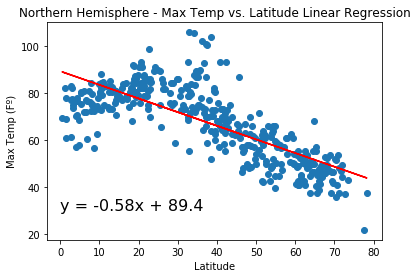

In [20]:
eq = linear_reg(north['Lat'], north['Max Temp'])
plt.annotate(eq,(0,30),fontsize=16,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Fº)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig('Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

The r-squared is : 0.75


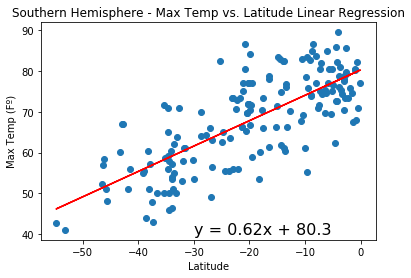

In [21]:
eq = linear_reg(south['Lat'], south['Max Temp'])
plt.annotate(eq,(-30,40),fontsize=16,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Fº)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig('Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

The r-squared is : -0.04


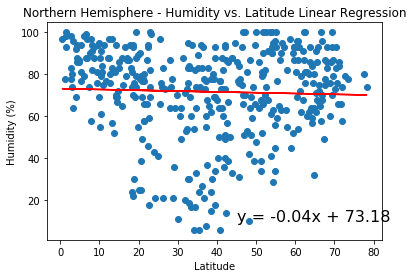

In [22]:
eq = linear_reg(north['Lat'], north['Humidity'])
plt.annotate(eq,(45,10),fontsize=16,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig('Images/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png')

The r-squared is : 0.01


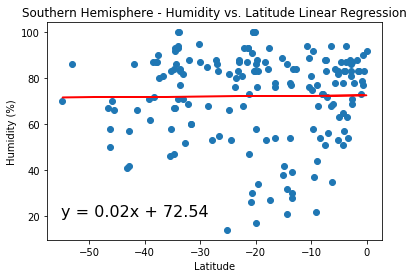

In [23]:
eq = linear_reg(south['Lat'], south['Humidity'])
plt.annotate(eq,(-55,20),fontsize=16,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig('Images/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png')

The r-squared is : -0.07


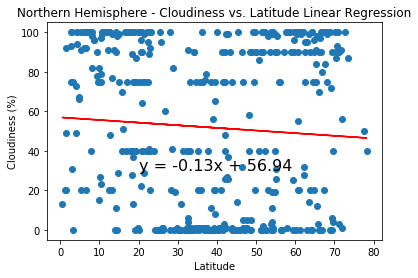

In [24]:
eq = linear_reg(north['Lat'], north['Cloudiness'])
plt.annotate(eq,(20,30),fontsize=16,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig('Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png')

The r-squared is : -0.01


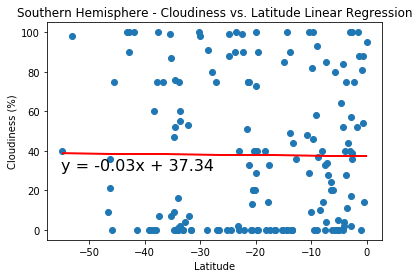

In [25]:
eq = linear_reg(south['Lat'], south['Cloudiness'])
plt.annotate(eq,(-55,30),fontsize=16,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig('Images/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png')

The r-squared is : 0.25


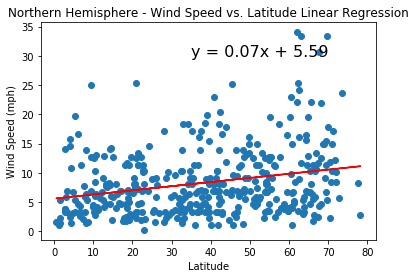

In [26]:
eq = linear_reg(north['Lat'], north['Wind Speed'])
plt.annotate(eq,(35,30),fontsize=16,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig('Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png')

The r-squared is : -0.09


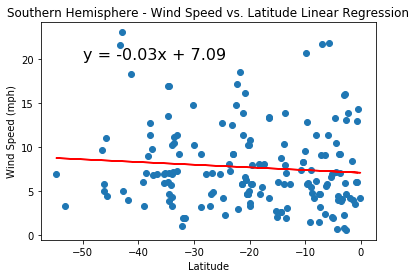

In [27]:
eq = linear_reg(south['Lat'], south['Wind Speed'])
plt.annotate(eq,(-50,20),fontsize=16,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig('Images/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png')